<a href="https://colab.research.google.com/github/AlvaroUriel/idal_ia3/blob/main/tfm_v3_1_061222.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
from tensorflow import keras
from tensorflow.keras.utils import load_img, img_to_array
import numpy as np
from keras.applications import imagenet_utils
import os
import cv2
from google.colab.patches import cv2_imshow

In [3]:
from  google.colab import drive
 
drive.mount('/content/drive/')

Mounted at /content/drive/


In [4]:
loaded_model = keras.models.load_model('/content/drive/MyDrive/IA3/TFM/archive/ModelTransfer/model_transfer_full.h5')

In [5]:
#Para preparar el conjunto de muestras
def create_features(dataset):
 
    x_scratch = []

    k=0

    #Bucle sobre las imagenes
    for imagePath in dataset:
 
        #Se cargan las imagenes a tamaño 224
        image = load_img(imagePath, target_size=(224, 224))
        image = img_to_array(image)
 
        # preprocess the image by (1) expanding the dimensions and
        # (2) subtracting the mean RGB pixel intensity from the
        # ImageNet dataset
        image = np.expand_dims(image, axis=0)
        image = imagenet_utils.preprocess_input(image)
 
        # add the image to the batch
        x_scratch.append(image)

        k = k+1
        #print('convertida:', k, ' de ', len(dataset))
 
    x = np.vstack(x_scratch)
    return x

In [6]:
!git clone https://github.com/ultralytics/yolov5  # clone
%cd yolov5
%pip install -qr requirements.txt  # install

import utils

display = utils.notebook_init()  # checks


YOLOv5 🚀 v7.0-24-gf8539a6 Python-3.8.15 torch-1.12.1+cu113 CUDA:0 (Tesla T4, 15110MiB)


Setup complete ✅ (2 CPUs, 12.7 GB RAM, 22.9/78.2 GB disk)


In [7]:
model = torch.hub.load('ultralytics/yolov5', 'custom', path='/content/drive/MyDrive/IA3/TFM/archive/YOLO/best.pt')  # yolov5n - yolov5x6 or custom
model.conf = 0.5

Downloading: "https://github.com/ultralytics/yolov5/zipball/master" to /root/.cache/torch/hub/master.zip
YOLOv5 🚀 v7.0-24-gf8539a6 Python-3.8.15 torch-1.12.1+cu113 CUDA:0 (Tesla T4, 15110MiB)

Fusing layers... 
Model summary: 157 layers, 7012822 parameters, 0 gradients, 15.8 GFLOPs
Adding AutoShape... 


In [8]:
model2clases = torch.hub.load('ultralytics/yolov5', 'custom', path='/content/drive/MyDrive/IA3/TFM/archive/YOLO/best_2clases.pt')  # yolov5n - yolov5x6 or custom
model2clases.conf = 0.5

Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-24-gf8539a6 Python-3.8.15 torch-1.12.1+cu113 CUDA:0 (Tesla T4, 15110MiB)

Fusing layers... 
Model summary: 157 layers, 7015519 parameters, 0 gradients, 15.8 GFLOPs
Adding AutoShape... 


Saved 1 image to /content/yolov5/runs/detect/exp3
Saved results to /content/yolov5/runs/detect/exp3



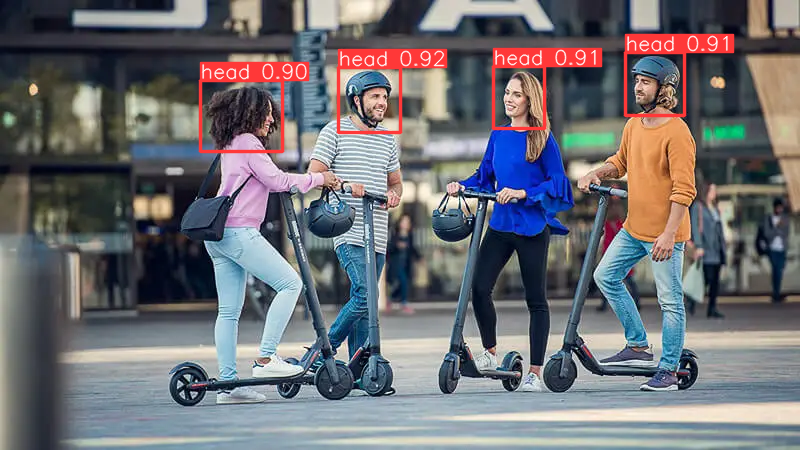

In [15]:
im = '/content/patinete-electrico-decathlon-opiniones.webp'  # file, Path, PIL.Image, OpenCV, nparray, list
results = model(im)  # inference 
crops = results.crop(save=True, save_dir='/content/yolov5/runs/detect/exp')
results.show()

In [16]:
l=len(os.listdir('/content/yolov5/runs/detect/'))
if(l<=1):
  yolo_path='/content/yolov5/runs/detect/exp/crops/head'
else:
  yolo_path='/content/yolov5/runs/detect/exp'+str(l)+'/crops/head'

yolo_path

'/content/yolov5/runs/detect/exp3/crops/head'

In [17]:

from_yolo=[]
#yolo_path='/content/yolov5/runs/detect/exp/crops/head'

for file in os.listdir(yolo_path):
  from_yolo.append(os.path.join(yolo_path, file))

from_yolo

['/content/yolov5/runs/detect/exp3/crops/head/patinete-electrico-decathlon-opiniones3.jpg',
 '/content/yolov5/runs/detect/exp3/crops/head/patinete-electrico-decathlon-opiniones.jpg',
 '/content/yolov5/runs/detect/exp3/crops/head/patinete-electrico-decathlon-opiniones2.jpg',
 '/content/yolov5/runs/detect/exp3/crops/head/patinete-electrico-decathlon-opiniones4.jpg']

In [18]:
features_from_yolo = create_features(from_yolo)

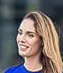

1/1 [==============================] - 0s 19ms/step
Predict:       0   Without helmet 0.96794


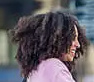

1/1 [==============================] - 0s 18ms/step
Predict:       0   Without helmet 0.98764


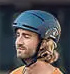

1/1 [==============================] - 0s 18ms/step
Predict:       1   With helmet 0.99093


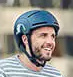

1/1 [==============================] - 0s 19ms/step
Predict:       1   With helmet 1.0


In [19]:

#Validación supervisada
classes_names = ('Without helmet','With helmet')

id=0

for im in from_yolo:

  #image = Img.imread(from_yolo[id])

  #plt.imshow(image[:,:,:], cmap='gray', vmin = 0, vmax = 255,interpolation='none')

  cv2_imshow(cv2.imread(from_yolo[id]))

  p = loaded_model.predict(np.expand_dims(features_from_yolo[id], axis=0))
  print("Predict:      ", p.argmax(), " ", classes_names[p.argmax()], round(float(p[:,p.argmax()]), 5))

  id=id+1

Saved 1 image to /content/yolov5/runs/detect/exp4
Saved results to /content/yolov5/runs/detect/exp4



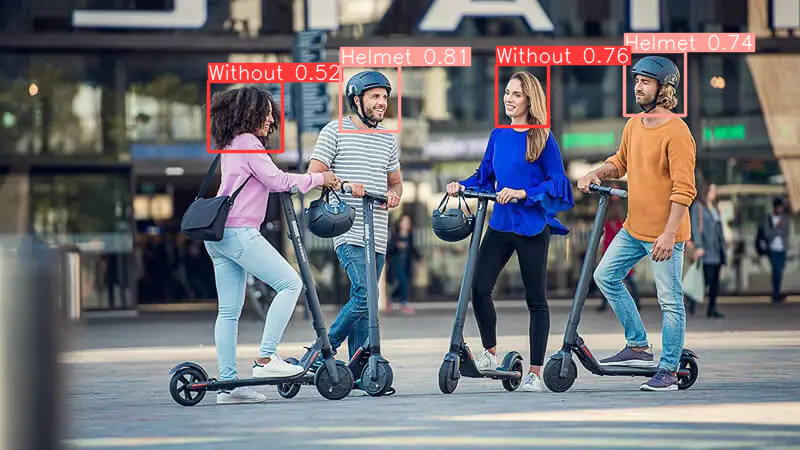

In [20]:
im = '/content/patinete-electrico-decathlon-opiniones.webp'  # file, Path, PIL.Image, OpenCV, nparray, list
results = model2clases(im)  # inference 
crops = results.crop(save=True, save_dir='/content/yolov5/runs/detect/exp')
results.show()